In [1]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np

plt.figure(figsize=(16,9))

%matplotlib inline

<Figure size 1600x900 with 0 Axes>

In [2]:
PROJECT_PATH = Path(os.path.dirname(os.path.dirname(os.path.abspath('movie-dataset (Gráficos)'))))
DADOS_PATH = PROJECT_PATH / 'dados' / 'saida' / 'movies.csv'

In [3]:
df = pd.read_csv(DADOS_PATH, parse_dates=['date'])
df

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,date,liquid
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000.0,46998772.0,Warner Bros.,146,1980-06-13,27998772.0
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104,1980-07-02,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124,1980-06-20,520375067.0
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88,1980-07-02,79953539.0
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98,1980-07-25,33846344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,O,R,Drama,6.1,19000.0,Tim Blake Nelson,William Shakespeare,Mekhi Phifer,United States,5000000.0,19260537.0,Chickie the Cop,95,2001-08-31,14260537.0
2541,Birthday Girl,R,Comedy,6.1,25000.0,Jez Butterworth,Tom Butterworth,Nicole Kidman,United States,13000000.0,16171098.0,FilmFour,93,2001-02-01,3171098.0
2542,Made,R,Comedy,6.4,18000.0,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000.0,5480653.0,Artisan Entertainment,95,2001-08-31,480653.0
2543,One Night at McCool's,R,Comedy,6.1,29000.0,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000.0,13578186.0,October Films,93,2001-04-27,-4421814.0


In [4]:
base = df.copy()

---

# Rating (Classificação)

In [5]:
sns.set_theme()

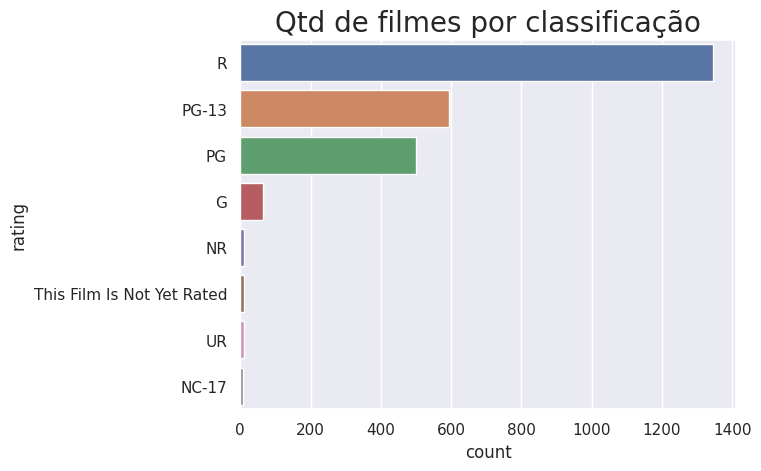

In [6]:
fig = sns.countplot(
    data=base, 
    y='rating',
    order = base['rating'].value_counts().index
)
fig.set_title('Qtd de filmes por classificação', fontdict={'fontsize': 20});

## Qual rating recebe mais orçamento?

/tmp/ipykernel_7592/2939283402.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


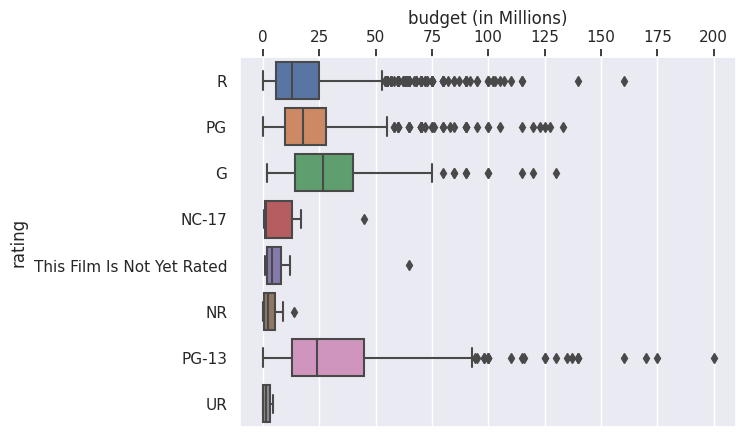

In [7]:
fig = sns.boxplot(
    data=base, 
    x="budget", 
    y="rating",
)
xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000000]
fig.set_xticklabels(xlabels)
fig.set(xlabel='budget (in Millions)')
fig.xaxis.set_ticks_position('top')
fig.xaxis.set_label_position('top')

/tmp/ipykernel_7592/3123707939.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


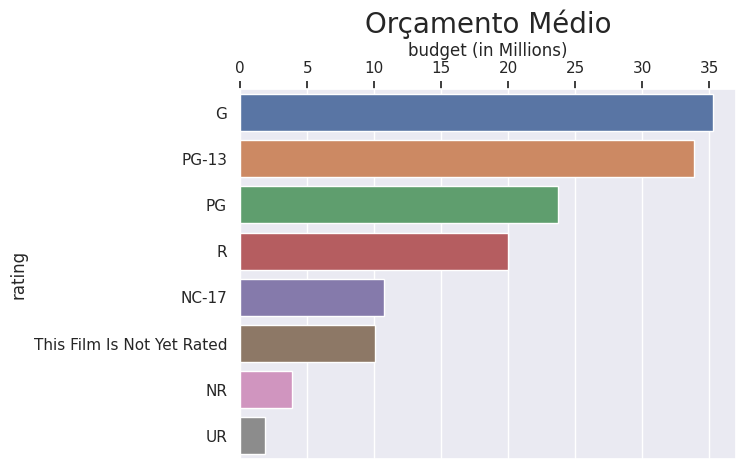

In [8]:
fig = sns.barplot(
    data=base.groupby(['rating'], as_index=False)['budget'].mean().sort_values('budget', ascending=False),
    x='budget',
    y='rating',
    errorbar=None,
)
xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000000]
fig.set_xticklabels(xlabels)
fig.set(xlabel='budget (in Millions)')
fig.set_title('Orçamento Médio', fontdict={'fontsize': 20})
fig.xaxis.set_label_position('top')
fig.xaxis.set_ticks_position('top')

/tmp/ipykernel_7592/2752086823.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


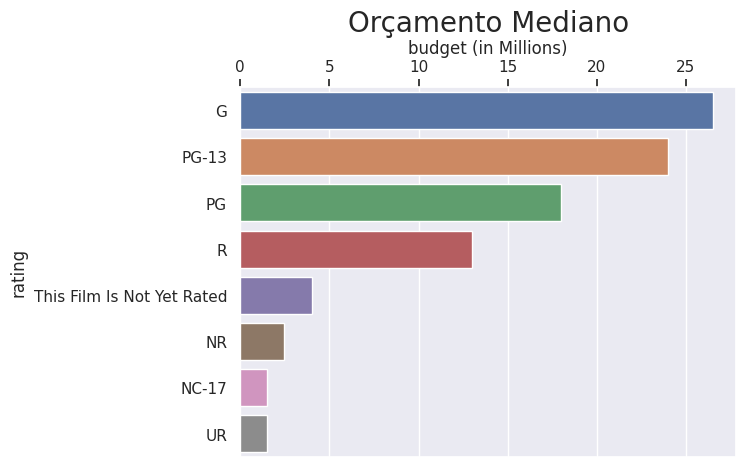

In [9]:
fig = sns.barplot(
    data=base.groupby(['rating'], as_index=False)['budget'].median().sort_values('budget', ascending=False),
    x='budget',
    y='rating',
    errorbar=None,
)
xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000000]
fig.set_xticklabels(xlabels)
fig.set(xlabel='budget (in Millions)')
fig.set_title('Orçamento Mediano', fontdict={'fontsize': 20})
fig.xaxis.set_label_position('top')
fig.xaxis.set_ticks_position('top')

/tmp/ipykernel_7592/1468618079.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


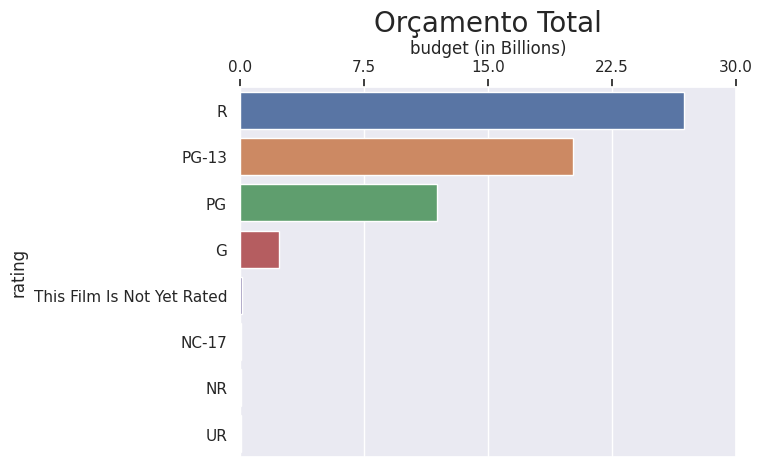

In [10]:
fig = sns.barplot(
    data=base.groupby(['rating'], as_index=False)['budget'].sum().sort_values('budget', ascending=False),
    y='rating',
    x='budget',
    errorbar=None
)
xticks = np.linspace(0, fig.get_xticks()[-1], num=5)
xlabels = ['{:,.1f}'.format(x) for x in xticks / 1000000000]
fig.set_xticklabels(xlabels)
fig.set_title('Orçamento Total', fontdict={'fontsize': 20})
fig.set(xlabel='budget (in Billions)')
fig.xaxis.set_ticks_position('top')
fig.xaxis.set_label_position('top')
plt.xticks(xticks);

## Qual rating tem mais lucro?

/tmp/ipykernel_7592/4221109430.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


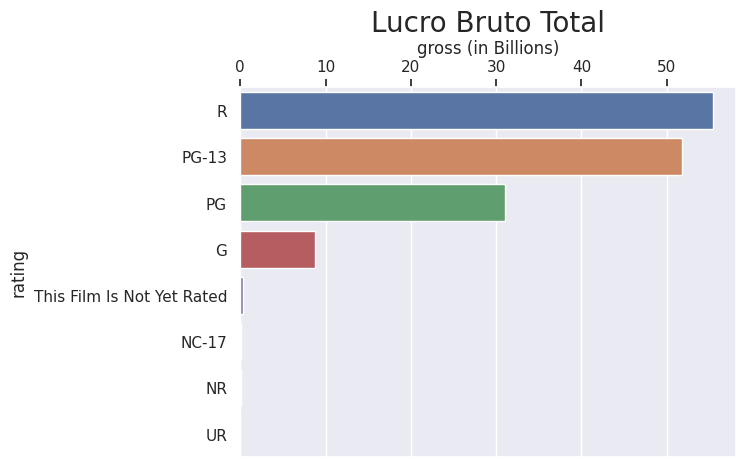

In [11]:
fig = sns.barplot(
    data=base.groupby(['rating'], as_index=False)['gross'].sum().sort_values('gross', ascending=False),
    x='gross',
    y='rating',
    errorbar=None
)

xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000000000]
fig.set_xticklabels(xlabels)
fig.set(xlabel='gross (in Billions)')
fig.set_title('Lucro Bruto Total', fontdict={'fontsize': 20})
fig.xaxis.set_label_position('top')
fig.xaxis.set_ticks_position('top')

/tmp/ipykernel_7592/3804033572.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


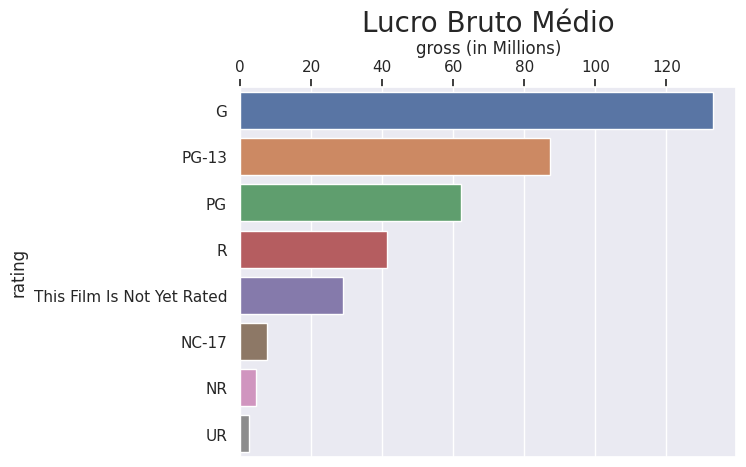

In [12]:
fig = sns.barplot(
    data=base.groupby(['rating'], as_index=False)['gross'].mean().sort_values('gross', ascending=False),
    x='gross',
    y='rating',
    errorbar=None,
)

xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000000]
fig.set_xticklabels(xlabels)
fig.set_title('Lucro Bruto Médio', fontdict={'fontsize': 20})
fig.set(xlabel='gross (in Millions)')
fig.xaxis.set_label_position('top')
fig.xaxis.set_ticks_position('top')

/tmp/ipykernel_7592/408469180.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


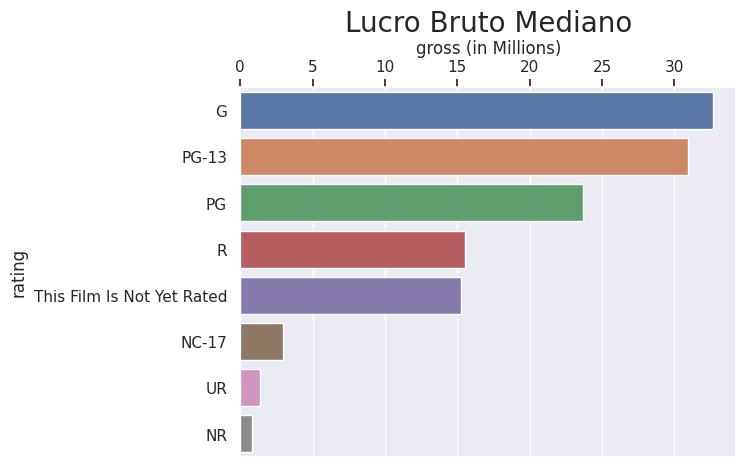

In [13]:
fig = sns.barplot(
    data=base.groupby(['rating'], as_index=False)['gross'].median().sort_values('gross', ascending=False),
    x='gross',
    y='rating',
    errorbar=None,
)

xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000000]
fig.set_xticklabels(xlabels)
fig.set_title('Lucro Bruto Mediano', fontdict={'fontsize': 20})
fig.set(xlabel='gross (in Millions)')
fig.xaxis.set_label_position('top')
fig.xaxis.set_ticks_position('top')

/tmp/ipykernel_7592/1195655507.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


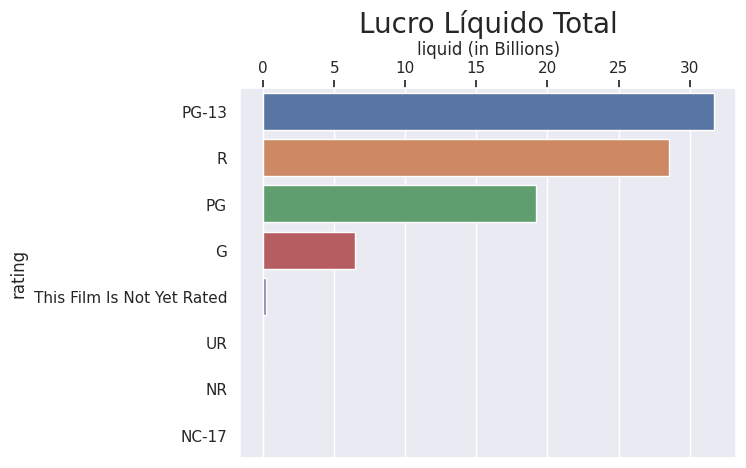

In [14]:
fig = sns.barplot(
    data=base.groupby(['rating'], as_index=False)['liquid'].sum().sort_values('liquid', ascending=False),
    x='liquid',
    y='rating',
    errorbar=None,
)

xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000000000]
fig.set_xticklabels(xlabels)
fig.set_title('Lucro Líquido Total', fontdict={'fontsize': 20})
fig.set(xlabel='liquid (in Billions)')

/tmp/ipykernel_7592/602191567.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


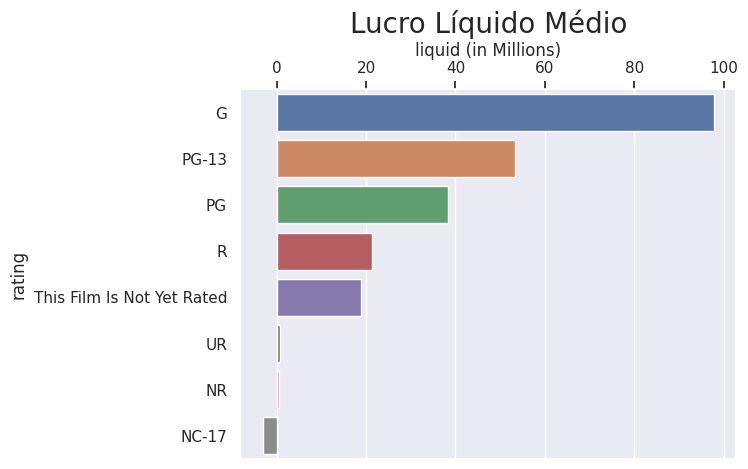

In [15]:
fig = sns.barplot(
    data=base.groupby(['rating'], as_index=False)['liquid'].mean().sort_values('liquid', ascending=False),
    x='liquid',
    y='rating',
    errorbar=None,
)

xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000000]
fig.set_xticklabels(xlabels)
fig.set_title('Lucro Líquido Médio', fontdict={'fontsize': 20})
fig.set(xlabel='liquid (in Millions)')